# Fazi skupovi i fazi logika

Motivacija: hocemo da opišemo/modeliramo nepreciznosti koje ćemo kasnije moći da koristimo za upravljanje.

Sadržaj:

 - definicija fazi skupa
 - fazi pravila i zaključivanje
 - fazifikacija
 - defazifikacija
 - fazi kontroler


In [113]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
class FuzzySet(object):
    def __init__(self, valuesX, valuesY):
        self.values = np.zeros((len(valuesX), 2))
        self.values[:, 0] = np.array(valuesX,  dtype='float')
        self.values[:, 1] = np.array(valuesY,  dtype='float')
        
    def value(self, x):        
        m,n = self.values.shape
        if x< self.values[0, 0]:
            return self.values[0, 1]
        elif x> self.values[-1, 0]:
            return self.values[-1, 1]
        else:
            for i in range(m-1):
                if self.values[i, 0]<=x and x<=self.values[i+1, 0]:
                    dpx = x-self.values[i, 0]
                    dx = self.values[i+1, 0]-self.values[i, 0]
                    dy = self.values[i+1, 1]-self.values[i, 1]
                    if dx != 0:
                        return self.values[i, 1]+dpx*dy/dx
                        
        return 0        

In [115]:
a = FuzzySet([0, 5, 10], [0,1, 0])

In [116]:
t = np.arange(-10, 20, 1)
y = [a.value(x) for x in t]

tt = np.array([6.7])
yy = a.value(tt)

print yy

[ 0.66]


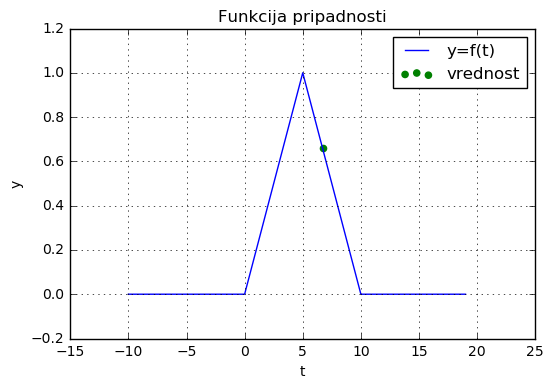

In [117]:
plt.plot(t, y, color='b', label='y=f(t)');
plt.scatter(tt, yy, color='g', label='vrednost')
plt.legend()
plt.title('Funkcija pripadnosti')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)

Linearna interpolacija definisana preko numpy metode

In [118]:
class FuzzySet(object):
    def __init__(self, aValuesX, aValuesY):
        self.valuesX = np.array(aValuesX, dtype='float')
        self.valuesY = np.array(aValuesY, dtype='float')
        
    def value(self, x):        
        return np.interp(x, self.valuesX, self.valuesY)
    
    def c(self):
        return ((self.valuesX*self.valuesY)/(self.valuesY.sum())).sum()

In [119]:
a = FuzzySet([0, 5, 10], [0,1, 0])

print a.c()

5.0


In [120]:
t = np.arange(-10, 20, 1)
y = a.value(t)

tt = np.array([6.7])
yy = a.value(tt)

print yy

[ 0.66]


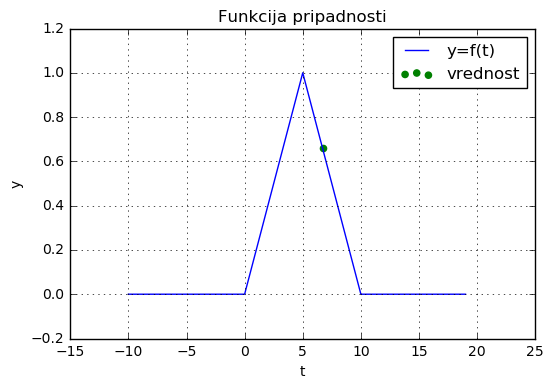

In [121]:
plt.plot(t, y, color='b', label='y=f(t)');
plt.scatter(tt, yy, color='g', label='vrednost')
plt.legend()
plt.title('Funkcija pripadnosti')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)

In [122]:
class TFuzzySet(FuzzySet):
    def __init__(self, a, b, c):
        self.valuesX = np.array([a, b, c])
        self.valuesY = np.array([0, 1, 0])


In [123]:
b = TFuzzySet(2, 7, 12)

In [124]:
yb = b.value(t)

print yb

[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.2  0.4
  0.6  0.8  1.   0.8  0.6  0.4  0.2  0.   0.   0.   0.   0.   0.   0.   0. ]


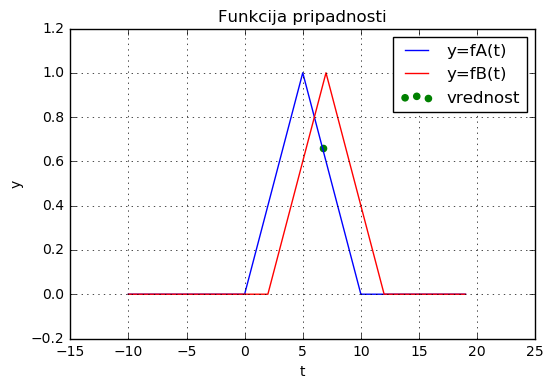

In [125]:
plt.plot(t, y, color='b', label='y=fA(t)');
plt.plot(t, yb, color='r', label='y=fB(t)');
plt.scatter(tt, yy, color='g', label='vrednost')
plt.legend()
plt.title('Funkcija pripadnosti')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)

## Unija i presek dva fuzzy skupa

In [126]:
class TFuzzySet(FuzzySet):
    def __init__(self, a, b, c):
        self.valuesX = np.array([a, b, c])
        self.valuesY = np.array([0, 1, 0])
    def union(self, B, domain):
        a = self.value(domain)
        b = B.value(domain)
        return np.maximum(a, b)
    
    def intersection(self, B, domain):
        a = self.value(domain)
        b = B.value(domain)
        return np.minimum(a, b)


In [127]:
a = TFuzzySet(0, 5, 10)
b = TFuzzySet(2, 7, 12)
t = np.arange(-10, 20, 1)

ya = a.value(t)
yb = b.value(t)
yab = a.union(b, t)


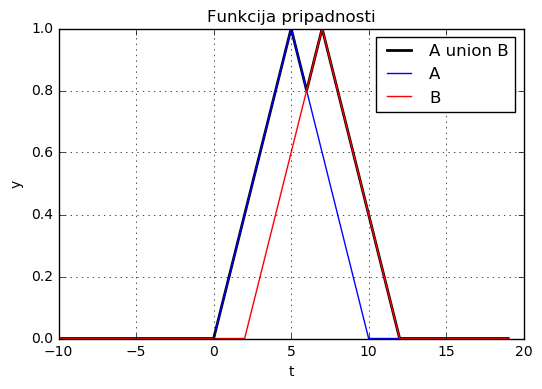

In [128]:
plt.plot(t, yab, color='k', label='A union B', lw=2);
plt.plot(t, ya, color='b', label='A');
plt.plot(t, yb, color='r', label='B');
plt.legend()
plt.title('Funkcija pripadnosti')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)

In [129]:

yab = a.intersection(b, t)


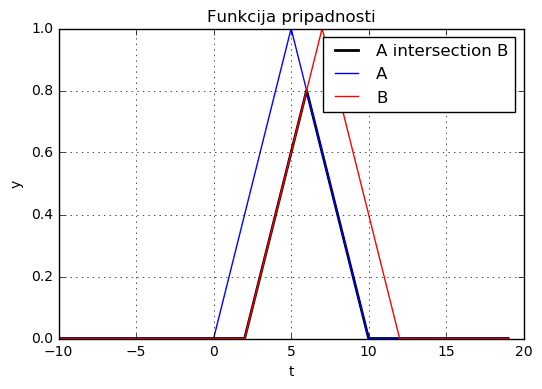

In [130]:
plt.plot(t, yab, color='k', label='A intersection B', lw=2);
plt.plot(t, ya, color='b', label='A');
plt.plot(t, yb, color='r', label='B');
plt.legend()
plt.title('Funkcija pripadnosti')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)

## Aritmetičke operacije

- sabiranje
- oduzimanje

In [131]:
t = np.arange(-10, 20, 0.1)

a = TFuzzySet(0, 5, 10)
b = TFuzzySet(1, 6, 11)

# sabiranje
c = TFuzzySet(1, 5+6, 10+11)

# oduzimanje
d = TFuzzySet(0-1, 5-6, 10-11)

ya = a.value(t)
yb = b.value(t)
yc = c.value(t)
yd = d.value(t)


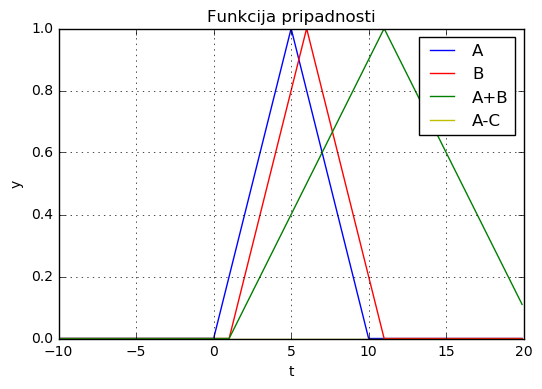

In [132]:
plt.plot(t, ya, color='b', label='A');
plt.plot(t, yb, color='r', label='B');
plt.plot(t, yc, color='g', label='A+B');
plt.plot(t, yd, color='y', label='A-C');
plt.legend()
plt.title('Funkcija pripadnosti')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)

## Fuzzy tačka

In [133]:
class FuzzyPoint(object):
    def __init__(self, m, r):
        self.m = m
        self.r = r
        
    def value2(self, x):        
        d = np.absolute(self.m-x)        
        return np.maximum(0, (self.r-d)/self.r)
    
    def value(self, x):
        return np.exp(-(x-self.m)**2/(2*self.r**2))    

In [134]:
t = np.arange(-10, 20, 0.1)

a = FuzzyPoint(5, 5)
b = FuzzyPoint(6, 5)

ya = a.value(t)
yb = b.value(t)


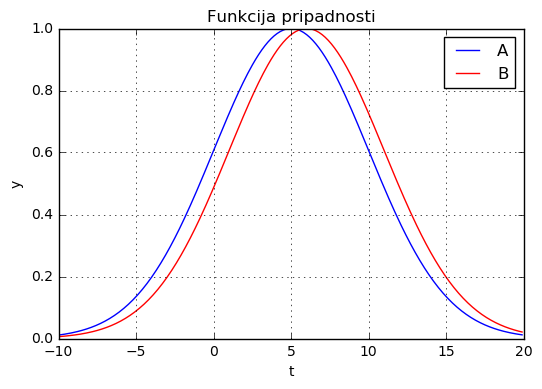

In [135]:
plt.plot(t, ya, color='b', label='A');
plt.plot(t, yb, color='r', label='B');
plt.legend()
plt.title('Funkcija pripadnosti')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)

In [136]:
t = np.arange(-10, 20, 0.1)

a = FuzzyPoint(5, 5)
b = FuzzyPoint(6, 5)

ya = a.value(t)
yb = b.value(t)

# sabiranje
c = FuzzyPoint(5+6, np.maximum(5,5))

# oduzimanje
d = FuzzyPoint(5-6, np.maximum(5,5))

ya = a.value(t)
yb = b.value(t)
yc = c.value(t)
yd = d.value(t)

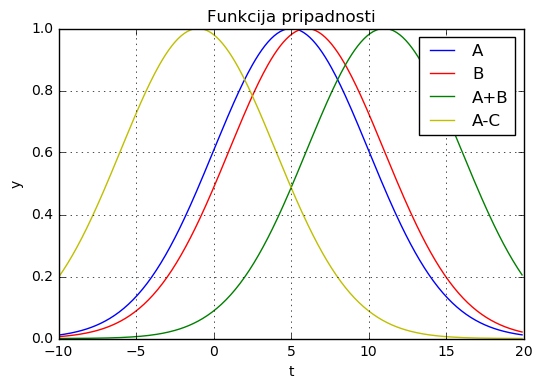

In [137]:
plt.plot(t, ya, color='b', label='A');
plt.plot(t, yb, color='r', label='B');
plt.plot(t, yc, color='g', label='A+B');
plt.plot(t, yd, color='y', label='A-C');
plt.legend()
plt.title('Funkcija pripadnosti')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)

# Problem upravljanja inverznim klatnom

![](images/mamdani.png?raw=true)


In [138]:
# konstante koje opisuju sistem
MV = 0.5 # masa vozila
mK = 0.2 # masa stapa
b = 0.01 # koeficient trenja
I = 0.006 # koeficient inercije stapa
l = 0.3 # duzina stapa
g = 9.81 # gravitaciono ubrzanje

# stanje sistema
t = 0
dt = 0.01

theta = 30*np.pi/180
dtheta = 2
ddtheta = 0

x = 0 
dx = 0
ddx = 0

u = 0


def model():
    l2 = l*l
    imenilac = I * (MV + mK) + MV * mK * l2    
    ddx = (-(I + mK * l2) * b * dx + g * l2 * theta + (I + mK * l2) * u) / imenilac    
    ddtheta = (-mK * l * b * dx + mK * g * l * (MV + mK) * theta + mK * l * u) / imenilac 
    return ddx, ddtheta
    
def novo_stanje():
    global theta, dtheta, ddtheta, x, dx, ddx, u, t
    
    ddx, ddtheta = model()
    
    x += dx*dt
    dx += ddx*dt
    theta += dtheta*dt
    dtheta += ddtheta*dt
    t += dt    

## Fazi kontroler

### Prostor stanja
 - uglovi - theta
 - ugaone brzine
 - pozicija
 - brzina kolica
 
#### univerzalini skup uglovi

-60 < theta < 60


In [139]:
# N,Z i P se uvode radi lakseg kasnijeg obelezavanja
N = 0
Z = 1
P = 2

In [140]:
thetaX = np.pi*np.array([-60.0, -20.0, 0, 20.0, 60.0])/180.0

#### fazi skupovi kojima se opisuje prostor uglova

In [141]:
thetaFM = [FuzzySet(thetaX, [1,1,0,0,0]),
           FuzzySet(thetaX, [0,0,1,0,0]),
           FuzzySet(thetaX, [0,0,0,1,1])
          ]

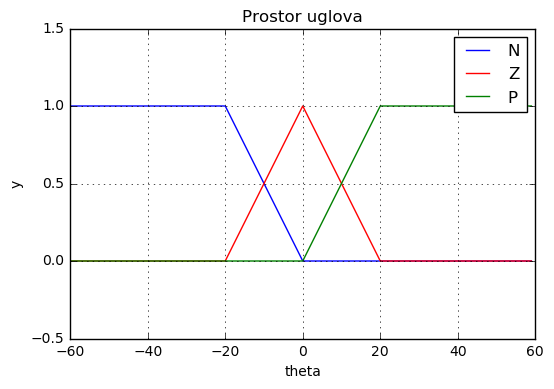

In [142]:
t = np.pi*np.arange(-60, 60, 1)/180.0
yN = thetaFM[N].value(t)
yZ = thetaFM[Z].value(t)
yP = thetaFM[P].value(t)

kk = 180/np.pi
plt.plot(t*kk, yN, color='b', label='N');
plt.plot(t*kk, yZ, color='r', label='Z');
plt.plot(t*kk, yP, color='g', label='P');
plt.ylim([-0.5,1.5])
plt.legend()
plt.title('Prostor uglova')
plt.xlabel('theta')
plt.ylabel('y')
plt.grid(True)

### fazi skupovi kojima se opisuje prostor ugaonih brzina

In [143]:
# univerzalini skup
dThetaX = np.array([-1.5, -0.75, 0, 0.75, 1.5])

# fazi skupovi
dThetaFM = [FuzzySet(dThetaX, [1,1,0,0,0]),
           FuzzySet(dThetaX, [0,0,1,0,0]),
           FuzzySet(dThetaX, [0,0,0,1,1])
          ]

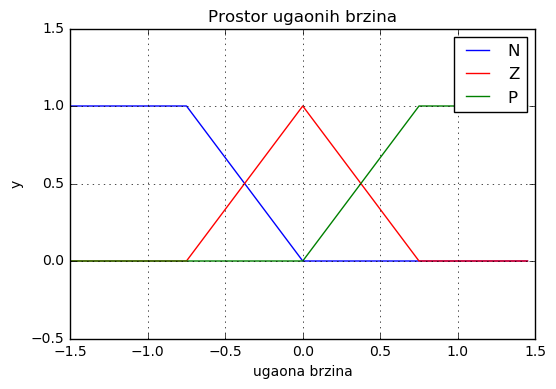

In [144]:
t = np.arange(-1.5, 1.5, 0.05)
yN = dThetaFM[N].value(t)
yZ = dThetaFM[Z].value(t)
yP = dThetaFM[P].value(t)

plt.plot(t, yN, color='b', label='N');
plt.plot(t, yZ, color='r', label='Z');
plt.plot(t, yP, color='g', label='P');
plt.ylim([-0.5,1.5])
plt.legend()
plt.title('Prostor ugaonih brzina')
plt.xlabel('ugaona brzina')
plt.ylabel('y')
plt.grid(True)

In [145]:
uX = np.array([-10, -5, 0, 5, 10])

uFM = [FuzzySet(uX, [1,1,0,0,0]),
       FuzzySet(uX, [0,0,1,0,0]),
       FuzzySet(uX, [0,0,0,1,1])
      ]

print uFM[N].c()
print uFM[Z].c()
print uFM[P].c()

-7.5
0.0
7.5


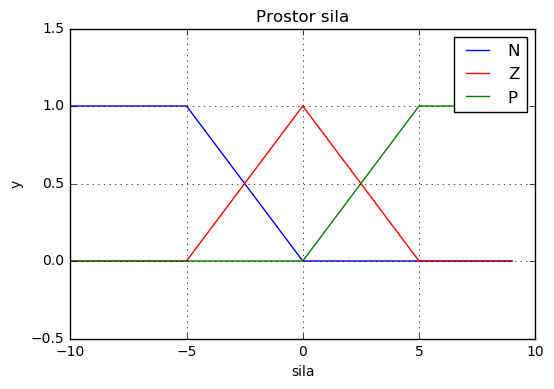

In [146]:
t = np.arange(-10, 10, 1)
yN = uFM[N].value(t)
yZ = uFM[Z].value(t)
yP = uFM[P].value(t)

plt.plot(t, yN, color='b', label='N');
plt.plot(t, yZ, color='r', label='Z');
plt.plot(t, yP, color='g', label='P');
plt.ylim([-0.5,1.5])
plt.legend()
plt.title('Prostor sila')
plt.xlabel('sila')
plt.ylabel('y')
plt.grid(True)

In [147]:
def fazifikacija(x, xFM):    
    xF = [
        xFM[N].value(x), 
        xFM[Z].value(x),
        xFM[P].value(x)]
    return xF

In [148]:
print fazifikacija(np.pi*10/180.0, thetaFM)

[0.0, 0.5, 0.5]


## Zaključivanje


In [149]:
pravila = np.array([
           [N,N,Z],
           [N,Z,P],
           [Z,P,P]
          ])

In [150]:
def zakljucivanje(thetaF, dThetaF):
    uF = [0,0,0]
    for i in range(3):
        for j in range(3):
            uF[pravila[i,j]] += thetaF[i] * dThetaF[j]
    return uF

In [151]:
print zakljucivanje(fazifikacija(np.pi*-5/180.0, thetaFM), fazifikacija(0.1, dThetaFM))

[0.21666666666666676, 0.6833333333333332, 0.09999999999999998]


In [152]:
def defazifikacija(uF):
    # metoda centra tezista
    retVal = uF[N]*uFM[N].c()+ uF[Z]*uFM[Z].c() +uF[P]*uFM[P].c()    
    return retVal

In [153]:
print defazifikacija(zakljucivanje(fazifikacija(np.pi*-5/180.0, thetaFM), fazifikacija(0.1, dThetaFM)))

-0.875


In [154]:
def upravljanje(theta, dTheta):
    return -defazifikacija(zakljucivanje(fazifikacija(theta, thetaFM), fazifikacija(dTheta, dThetaFM)))

print upravljanje(np.pi*1/180.0,0)

-0.375


## Simulacija ponašanja sistema

In [156]:
#simulacija
t = 0
dt = 0.01

theta = 30*np.pi/180
dtheta = 2
ddtheta = 0

x = 0 
dx = 0
ddx = 0

u = 0

tt = []
uglovi = []
duglovi = []
uu = []

for i in range(400):
    u = upravljanje(theta, dtheta)
    #print u, theta, dtheta
    uu.append(u)
    novo_stanje()
    tt.append(t)
    uglovi.append(180*theta/np.pi)
    duglovi.append(dtheta)
    
tt = np.array(tt)
uglovi = np.array(uglovi)
duglovi = np.array(duglovi)
uu = np.array(uu)


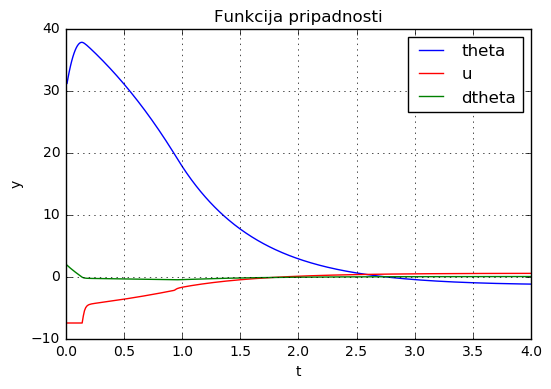

In [157]:
plt.plot(tt, uglovi, color='b', label='theta');
plt.plot(tt, uu, color='r', label='u');
plt.plot(tt, duglovi, color='g', label='dtheta');
plt.legend()
plt.title('Funkcija pripadnosti')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)